In [2]:
import pandas as pd
df1=pd.read_csv("D:\\YENEPOYA - MANGALORE//yen-1234.csv")

In [3]:
df2=df1.iloc[0:51,:]

In [4]:
df2.head(2)

,timestamp,household_id,household_size,smart_meter,tariff_per_kwh_usd,appliance,power_watts,voltage_v,current_a,duration_minutes,...,cost_usd,room_temp_c,outside_temp_c,occupancy_count,day_of_week,is_weekend,season,holiday_flag,date,daily_cumulative_kwh
0,01-01-2024 02:00,H0126,5,1,0.15,microwave,1232.5,229.3,5.37,73,...,0.2249,25.7,34.8,3,Monday,0,winter,0,01-01-2024,5.7018
1,02-01-2024 10:00,H0094,4,1,0.12,computer,182.4,232.4,0.78,37,...,0.0135,12.4,19.6,1,Tuesday,0,winter,0,02-01-2024,3.1021


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             51 non-null     object 
 1   household_id          51 non-null     object 
 2   household_size        51 non-null     int64  
 3   smart_meter           51 non-null     int64  
 4   tariff_per_kwh_usd    51 non-null     float64
 5   appliance             51 non-null     object 
 6   power_watts           51 non-null     float64
 7   voltage_v             51 non-null     float64
 8   current_a             51 non-null     float64
 9   duration_minutes      51 non-null     int64  
 10  energy_kwh            51 non-null     float64
 11  cost_usd              51 non-null     float64
 12  room_temp_c           51 non-null     float64
 13  outside_temp_c        51 non-null     float64
 14  occupancy_count       51 non-null     int64  
 15  day_of_week           51 

In [6]:
df2.isnull().sum()

timestamp               0
household_id            0
household_size          0
smart_meter             0
tariff_per_kwh_usd      0
appliance               0
power_watts             0
voltage_v               0
current_a               0
duration_minutes        0
energy_kwh              0
cost_usd                0
room_temp_c             0
outside_temp_c          0
occupancy_count         0
day_of_week             0
is_weekend              0
season                  0
holiday_flag            0
date                    0
daily_cumulative_kwh    0
dtype: int64

In [7]:
#selecection
x=df2[["power_watts","voltage_v","current_a"]]
y=df2["smart_meter"]

In [22]:
#split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.25,
                                              random_state=43)

In [23]:
#model
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(max_iter=750)
model_lr_fit=model_lr.fit(x_train,y_train)

In [24]:
#model predection
y_pred=model_lr_fit.predict(x_test)

In [25]:
#model evaluation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [26]:
model_cm=confusion_matrix(y_test,y_pred)
print(model_cm)

[[0 4]
 [2 7]]


In [27]:
model_report=classification_report(y_test,y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.78      0.70         9

    accuracy                           0.54        13
   macro avg       0.32      0.39      0.35        13
weighted avg       0.44      0.54      0.48        13



In [28]:
from sklearn.metrics import roc_curve,roc_auc_score

In [31]:
y_probs=model_lr_fit.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_probs)
auc_score=roc_auc_score(y_test,y_probs)

In [32]:
print(f"AUC:{auc_score:.3f}")

AUC:0.417


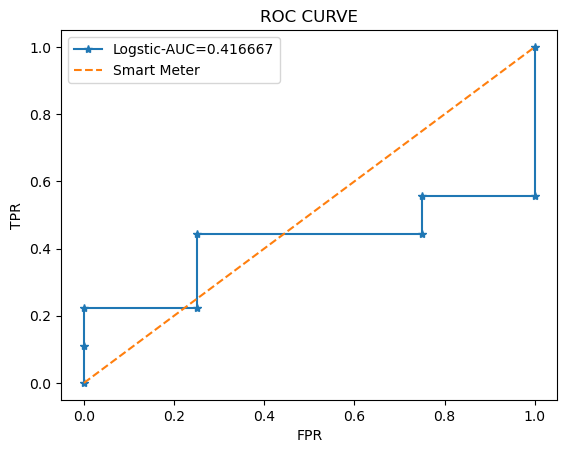

In [37]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,marker="*",label=("Logstic-AUC=%3f") %auc_score)
plt.plot([0,1],[0,1],label="Smart Meter", linestyle="--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.legend()
plt.show()